/var/folders/jj/9j0c_6196zx24tx5jb3ngnym0000gn/T/ipykernel_93214/1688026543.py:31: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, interval = interval, period = PERIOD)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,gain,loss,avg_gain,avg_loss,RSI,BB_SMA,BB_STD,Upper Band,Lower Band,RSI_Strategy,BB_Strategy,Confl_strategy,Strategy,asset_cum_returns,strategy_cum_returns
32,381.684998,382.429504,381.029999,382.230011,3802911,0.000000,0.375000,0.555723,0.896081,38.278095,381.953539,3.429532,388.812603,375.094474,NaN,NaN,NaN,0,NaN,NaN
33,382.049988,383.059998,381.690002,381.690002,6102224,0.364990,-0.000000,0.581794,0.832509,41.136443,382.030038,3.412896,388.855831,375.204246,0.0,0.0,0.0,0,0.000956,0.00000
34,382.899994,382.950012,381.559998,382.049988,7278511,0.850006,-0.000000,0.594650,0.832509,41.666718,381.917538,3.340965,388.599469,375.235608,0.0,0.0,0.0,0,0.003183,0.00000
35,382.410004,383.010010,379.649994,382.790009,12365271,0.000000,0.489990,0.594650,0.386507,60.607010,381.714539,3.168698,388.051935,375.377142,0.0,0.0,0.0,0,0.001899,0.00000
36,382.349915,383.089996,381.609985,382.399994,6916905,0.000000,0.060089,0.594650,0.366085,61.895362,381.549785,3.036486,387.622757,375.476812,0.0,0.0,0.0,0,0.001742,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5081,675.049988,675.640015,672.760010,674.400024,8106653,0.654968,-0.000000,0.586788,1.116786,34.444504,678.484995,4.956849,688.398693,668.571296,0.0,0.0,0.0,0,0.768605,0.06543
5082,673.130005,675.659973,672.140015,675.054993,9745100,0.000000,1.919983,0.513572,1.253928,29.056391,677.984995,4.967985,687.920964,668.049025,0.0,0.0,0.0,0,0.763575,0.06543
5083,674.019897,674.440002,671.489990,673.109985,9663134,0.889893,-0.000000,0.577135,1.199284,32.488686,677.540988,4.901977,687.344942,667.737034,1.0,0.0,1.0,0,0.765906,0.06543
5084,672.645020,675.119995,672.210022,674.020020,9331407,0.000000,1.374878,0.533561,1.297490,29.139593,677.029739,4.849866,686.729472,667.330007,0.0,0.0,0.0,0,0.762304,0.06543


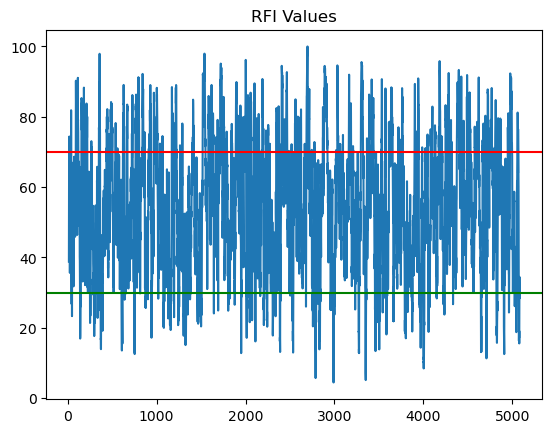

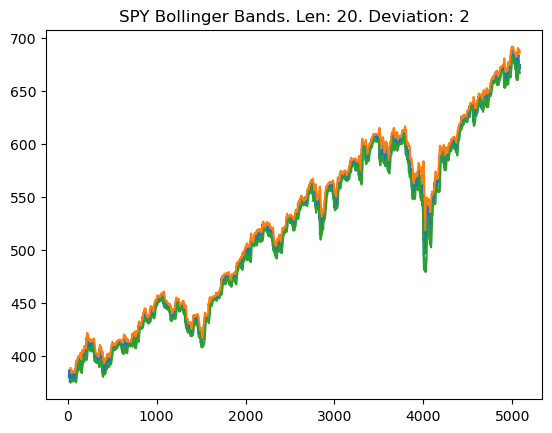

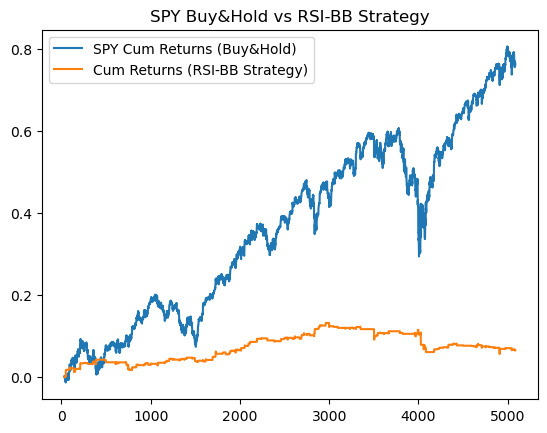

In [27]:
import numpy as np 
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Ticker
TICKER = "SPY"

# Step 2: Price Behavior 
INTERVAL = "1h"
if INTERVAL == "1h":
    PERIOD = "730d"
else:
    PERIOD = "max"

# Step 3: RSI
RSI_LENGTH = 14
RSI_OVERBROUGHT = 70
RSI_OVERSOLD = 30

# Step 4: BB
BB_LENGTH = 20
STD_DEV = 2

# Step 5: Data subsection
LOOKBACK = 10000

def get_data(ticker = TICKER, interval = INTERVAL, lookback = LOOKBACK):

    # Step 1: Download Data
    df = yf.download(ticker, interval = interval, period = PERIOD)

    # Step 2: Select only Level 0 of Multilevel Columns
    df.columns = df.columns.get_level_values(0)

    # Step 3: Simplifying df for Plots
    df = df.reset_index(drop=True)

    return df.iloc[-lookback:, :]

def add_RSI(df, length = RSI_LENGTH, overbrought = RSI_OVERBROUGHT, oversold = RSI_OVERSOLD):
    
    # Step 1: Define Delta (Price changes between the Rows)
    price_change = df["Close"].diff()

    # Step 2: Group Price Changes based on Positive/Negative Returns
    df["gain"] = price_change.where(price_change > 0, 0)
    df["loss"] = -price_change.where(price_change < 0, 0)

    # Step 3: Calculate the Rolling Average for Length Days
    df["avg_gain"] = df["gain"].rolling(window = length).mean()
    df["avg_loss"] = df["loss"].rolling(window = length).mean()

    # Step 4: Calculate the Relative Strength
    rs = df["avg_gain"] / df["avg_loss"]
        # In percentage Terms: how much stronger have the Up Days been compared to the Down Days
        # rs = 3: avg_gain was 3x larger than the average loss --> Strong Upward Momentum
        # rs = 0.5: avg_gain was half the size of the average loss --> Strong Downward Momentum

    # Step 5: Calculate the RSI w/ Standardization (Values between 0-100)
    df["RSI"] = 100 - (100/(1+rs))

    # Step 6: Plot the RSI
    plt.figure()
    plt.plot(df["RSI"])
    plt.title("RFI Values")

    # Step 7: Plot horizontal lines for Overbrought/Oversold
    plt.axhline(overbrought, color="red")
    plt.axhline(oversold, color="green")
        # Crossing Overbrought Line: triggers Short Signal 
        # Crossing Oversold Line: triggers Long Signal
    
    return df.dropna()


def add_BB(df, std_dev = STD_DEV, length = BB_LENGTH):

    # Step 1: Middle Bend Column
    df["BB_SMA"] = df["Close"].rolling(window=length).mean()
        # rolling(window=length): it takes the Close price and creates a moving window of length periods
        # mean(): it calculates the average price within that window at each step

    # Step 2: Std Deviation Column
    df["BB_STD"] = df["Close"].rolling(window=length).std()
        # std. dev/volatility: quantifies how spread out/ inconsistent your data is. 
        # It measures the average distance of each data point from the mean of the entire set

    # Step 3: Upper Band
    df["Upper Band"] = df["BB_SMA"] + (std_dev * df["BB_STD"])
        # It takes the middle band's value and adds the volatility * std_dev factor (typically 2) 
        # This places the upper line 2 std_dev above the middle band.

    # Step 4: Lower Band
    df["Lower Band"] = df["BB_SMA"] - (std_dev * df["BB_STD"])

    # Step 5: Plot the BB
    plt.figure()
    plt.plot(df["Close"]) # Blue
    plt.plot(df["Upper Band"]) # Orange
    plt.plot(df["Lower Band"]) # Green
    plt.title(f"{TICKER} Bollinger Bands. Len: {BB_LENGTH}. Deviation: {STD_DEV}")

    return df.dropna()
    # Drop na, since it takes us 20 days to get the first rollings average values 

def add_RSI_strategy(df, overbrought = RSI_OVERBROUGHT, oversold = RSI_OVERSOLD):

    # Step 1: Short when RSI > overbrought, Long when RSI < oversold, Wait when none apply
    df["RSI_Strategy"] = np.where(df["RSI"] > overbrought, -1,
                        np.where(df["RSI"] < oversold, 1, 0))
    
    # Step 2: Prevent Lookahead Bias (Only use available information)
    df["RSI_Strategy"] = df["RSI_Strategy"].shift(1)

    return df

def add_BB_strategy(df):

    # Step 1: Short when Close > Upper Band, Long when Close < Lower Band, Wait when none apply 
    df["BB_Strategy"] = np.where(df["Close"] > df["Upper Band"], -1,
                        np.where(df["Close"] < df["Lower Band"], 1, 0))
    
    # Step 2: Prevent Lookahead Bias (Only use available information)
    df["BB_Strategy"] = df["BB_Strategy"].shift(1)

    return df

def add_confluence_strategy(df):

    # Step 1: Sum both Strategies
    df["Confl_strategy"] = df["RSI_Strategy"] + df["BB_Strategy"]

    # Step 1: Only keep values of 2, 0 or -2 (where both strategies align)
    df["Strategy"] = np.where(df["Confl_strategy"] == 2, 1,
                    np.where(df["Confl_strategy"] == -2, 1, 0))
    
    return df

def test_strategy(df):

    # Step 1: Buy&Hold Compound Returns - What is my total profit if I bought on day one and just held it?
    df["asset_cum_returns"] = (1 + df["Close"].pct_change()).cumprod() - 1
        # pct.change(): get the tiny percentage return per day
        # cumprod(): multiply all of those returns together (compounding)
        # 1+ ... -1: turn daily returns like 2% in 1.02 and then back to eg 30% again

    # Step 2: Total Profits only if I followed my strategy's signals
    df["strategy_cum_returns"] = (1 + df["Close"].pct_change() * df["Strategy"]).cumprod() -1
        # *df["Strategy": 
            # (1) you get the normal daily return, 
            # (-1) you get the opposite of the daily return. Only if the market goes down, you win
            # (0) you wait and get 0 return 

    # Step 3: Plot Returns
    plt.figure()
    plt.plot(df["asset_cum_returns"])
    plt.plot(df["strategy_cum_returns"])
    plt.legend([f"{TICKER} Cum Returns (Buy&Hold)", "Cum Returns (RSI-BB Strategy)"])
    plt.title(f"{TICKER} Buy&Hold vs RSI-BB Strategy")

    return df

def main():
    df = get_data()
    df = add_RSI(df)
    df = add_BB(df)
    df = add_RSI_strategy(df)
    df = add_BB_strategy(df)
    df = add_confluence_strategy(df)
    df = test_strategy(df)

    return df

df = main()
df

In [28]:
df["RSI_Strategy"].value_counts()

RSI_Strategy
 0.0    3404
-1.0    1149
 1.0     500
Name: count, dtype: int64

In [29]:
df["BB_Strategy"].value_counts()

BB_Strategy
 0.0    4494
-1.0     295
 1.0     264
Name: count, dtype: int64

In [30]:
df["Confl_strategy"].value_counts()

Confl_strategy
 0.0    3171
-1.0    1090
 1.0     466
-2.0     177
 2.0     149
Name: count, dtype: int64

In [31]:
df["Strategy"].value_counts()

Strategy
0    4728
1     326
Name: count, dtype: int64